<a href="https://colab.research.google.com/github/samanthajmichael/machine_learning/blob/main/notebooks/KNN_Lab_Michael_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSBA 6165: AI & Deep Learning**

Professor: Rick Chakra

TA: Geethika Balasubramanian

# KNN Classifier

In [31]:
#update scikit-learn, restart, and rerun imports from first cell
#!pip install --upgrade scikit-learn
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

## Creating KNN with Iris Data



Iris data set consists of 150 samples having three classes namely Iris-Setosa, Iris-Versicolor, and Iris-Virginica. Four features/attributes contribute to uniquely identifying as one of the three classes are sepal-length, sepal-width, petal-length and petal-width.


In [2]:
# import
from sklearn.datasets import load_iris

load_iris has both the data and the class labels for each sample. Let's quickly extract all of it.

In [3]:
# Load the dataset
data = load_iris().data

data variable will be a numpy array of shape (150,4) having 150 samples each having four different attributes. Each class has 50 samples each.

In [4]:
# Print the dataset dimensions
data.shape

(150, 4)

Let's extract the class labels.

In [5]:
# Extract the labels
labels = load_iris().target

In [6]:
# Print the dimensions
labels.shape

(150,)

Next, you have to combine the data and the class labels, and for that, you will use an excellent python library called NumPy. NumPy adds support for large, multi-dimensional arrays and matrices, along with an extensive collection of high-level mathematical functions to operate on these arrays. So, let's quickly import it!

Since data is a 2-d array, you will have to reshape the labels also to a 2-d array.

In [7]:
# Reshape the data
labels = np.reshape(labels,(150,1))

Now, you will use the concatenate function available in the numpy library, and you will use axis=-1 which will concatenate based on the second dimension.

In [8]:
# Concatenate using second dimension
data = np.concatenate([data,labels],axis=1)

In [9]:
# Print the dimensions
data.shape

(150, 5)

In [10]:
#Add list of column names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [11]:
# Create a dataframe
dataset = pd.DataFrame(data,columns=names)

In [12]:
#look at what data looks like
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Now, you have the dataset data frame that has both data & the class labels that you need!

As you can see the label for species is not clear just by looking at it, so lets change the label for species from a number into actual names. You will use inplace=True which will modify the data frame dataset.

In the real world you'd need to look at documentation to learn what the number values meant

In [13]:
# Recode the labels
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

Let's print the first five rows of the dataset and see what it looks like!

In [14]:
# Print the first rows
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Analyze your Data

Let's quickly find out how all the three flowers look like when visualized and how different they are from each other not just in numbers but also in real!
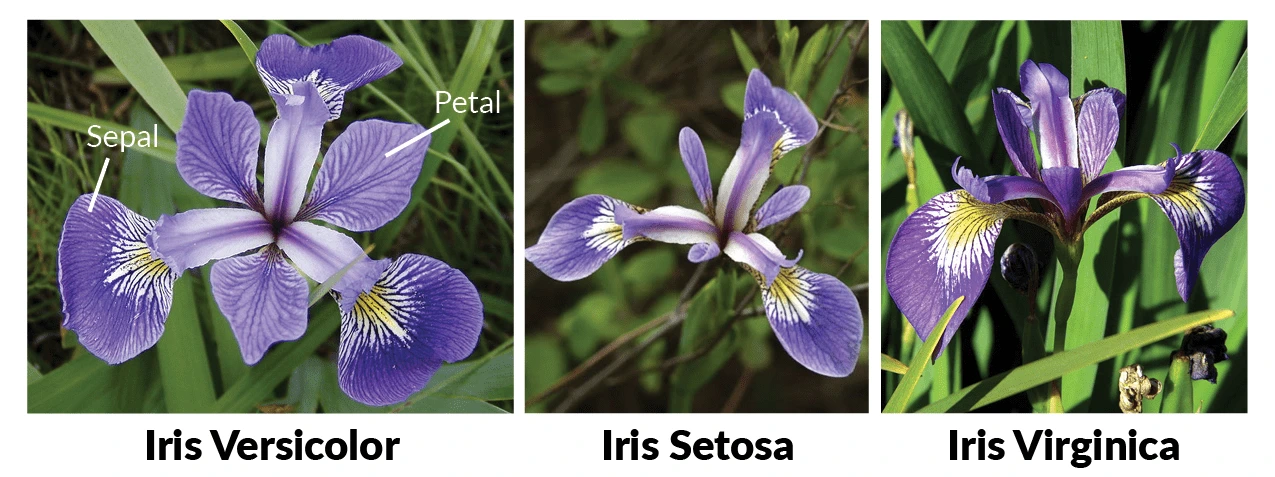

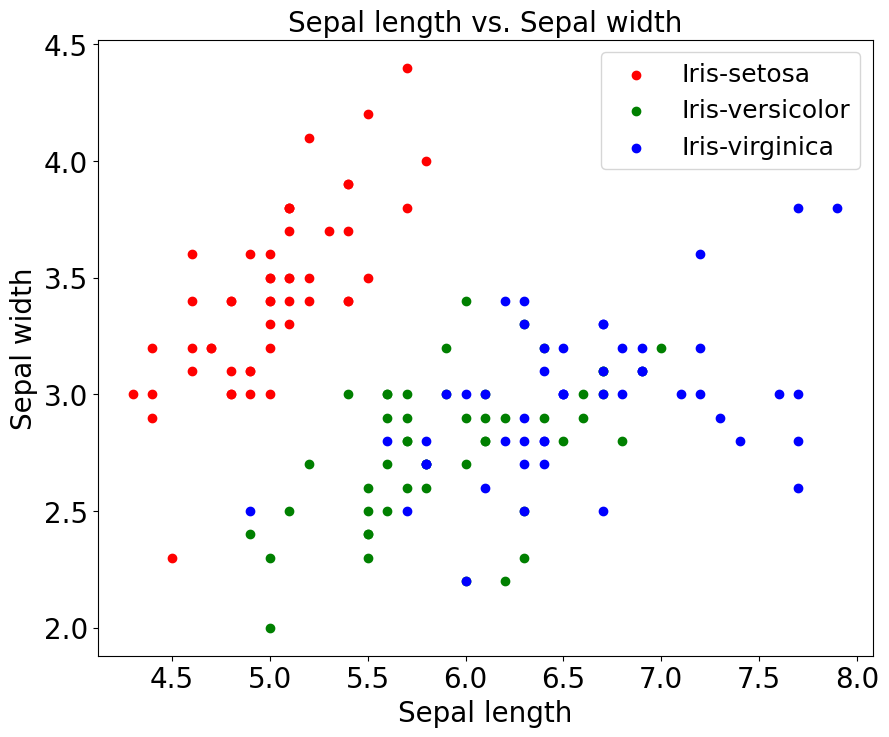

In [15]:
# plot the Sepal data
plt.figure(4, figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

From the above plot, it is very much apparent that there is a high correlation between the Iris setosa flowers w.r.t the sepal length and sepal width. On the other hand, there is less correlation between Iris versicolor and Iris virginica. The data points in versicolor & virginica are more spread out compared to setosa that are dense.

Let's just quickly also plot the graph for petal-length and petal-width.

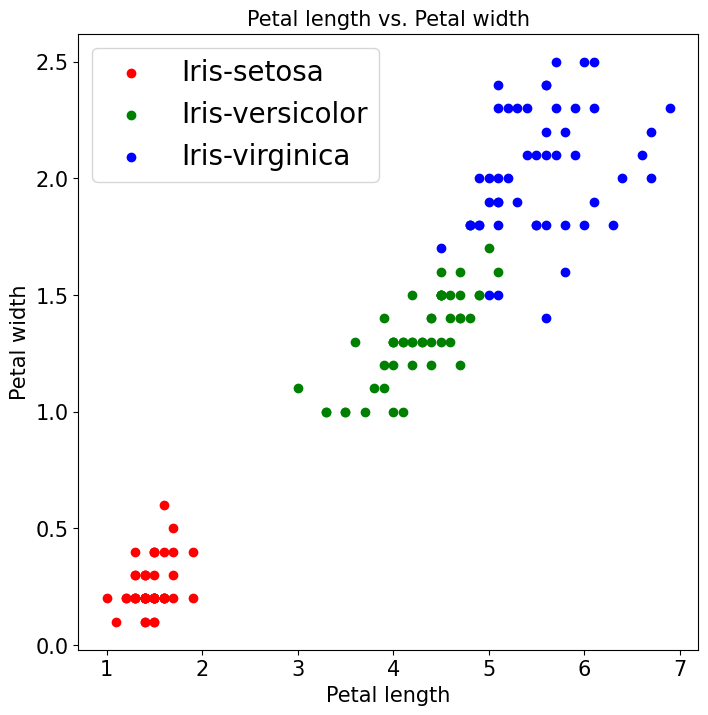

In [16]:
# plot the Petal data
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

Even when it comes to petal-length and petal-width, the above graph indicates a strong correlation for setosa flowers which are densely clustered together.

In [17]:
# Check correlation
dataset.iloc[:,:].select_dtypes(['int','float64']).corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.117570,0.871754,0.817941
sepal-width,-0.117570,1.000000,-0.428440,-0.366126
petal-length,0.871754,-0.428440,1.000000,0.962865
petal-width,0.817941,-0.366126,0.962865,1.000000


The above table signifies a strong correlation of 0.96 for petal-length and petal-width when all three species are combined.

Let's also analyze the correlation between all three species separately.

In [18]:
# Check correlation
dataset.iloc[:50,:].select_dtypes(['int','float64']).corr() #setosa

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [19]:
# Check correlation
dataset.iloc[50:100,:].select_dtypes(['int','float64']).corr() #versicolor

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [20]:
# Check correlation
dataset.iloc[100:,:].select_dtypes(['int','float64']).corr() #virginica

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


From the above three tables, it is pretty much clear that the correlation between petal-length and petal-width of setosa and virginica is 0.33 and 0.32 respectively. Whereas, for versicolor it is 0.78.

## Preprocessing your Data

After having loaded the data and analyzed it extensively, it is time to prepare your data which you can then feed to your ML model. In this section, you will preprocess your data in two ways: normalizing your data and splitting your data into training and testing sets.

Normalizing your data
There can be two ways by which you can normalize your data:

* *Example normalization* wherein you normalize each sample individually,
* *Feature normalization* in which you normalize each feature in the same way across all samples.

Now the question is why or when do you need to normalize your data? And do you need to standardize the Iris data?

Well, the answer is pretty much all the time. It is a good practice to normalize your data as it brings all the samples in the same scale and range. Normalizing the data is crucial when the data you have is not consistent. You can check for inconsistency by using the describe() function that you studied above which will give you max and min values. If the max and min values of one feature are significantly larger than the other feature then normalizing both the features to the same scale is very important.

Let's say X is one feature having a larger range and Y being the second feature with a smaller range. Then, the influence of feature Y can be overpowered by feature X's influence. In such a case, it becomes important to normalize both the features X and Y.

In Iris data, normalization is not required.

Let's print the *describe()* function and see why you do not need any normalization.

In [21]:
# Print dataset info
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal-length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal-width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal-length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal-width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


The sepal-length attribute has values that go from 4.3 to 7.9 and sepal-width contains values from 2 to 4.4, while petal-length values range from 1 to 6.9 and petal-width ranges from 0.1 to 2.5. The values of all the features are within the range of 0.1 and 7.9, which you can consider acceptable. Hence, you do not need to apply any normalization to the Iris dataset.

## Splitting the data

Let's split the data just like we did last week

In [22]:
# Split the data
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,4], stratify = dataset.iloc[:,4], test_size=0.2, random_state=42)

In [23]:
train_label.value_counts()

,count
species,
Iris-setosa,40
Iris-virginica,40
Iris-versicolor,40


Note that the *random_state* is a seed that takes a random_state as input if you change the number the split of the data will also change. However, if you keep the random_state same and run the cell multiple times the data splitting will remain unchanged.

Let's quickly print the shape of training and testing data along with its labels.

In [24]:
# Print dimensions
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((120, 3), (120,), (30, 3), (30,))

Finally, it's time to feed the data to the k-nearest neighbor algorithm!

## The KNN Model
After all the loading, analyzing and preprocessing of the data, it is now time when you will feed the data into the KNN model. To do this, you will use sklearn's inbuilt function neighbors which has a class called KNeigborsClassifier in it.

Let's start by importing the classifier.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

**Note:** the k (n_neighbors) parameter is often an odd number to avoid ties in the voting scores.

In order to decide the best value for hyperparameter k, you will do something called grid-search. You will train and test your model on 10 different k values and finally use the one that gives you the best results.

Let's initialize a variable neighbors(k) which will have values ranging from 1-9 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy. You will need them later to plot a graph to choose the best neighbor value.

In [26]:
# Initialize k
neighbors = np.arange(1,9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

Next piece of code is where all the magic will happen. You will enumerate over all the nine neighbor values and for each neighbor you will then predict both on training and testing data. Finally, store the accuracy in the train_accuracy and test_accuracy numpy arrays.

In [27]:
for i,k in enumerate(neighbors):

    # Instantiate classifiers
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

Next, you will plot the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph you will be able to choose the best k value at which your model performs the best.

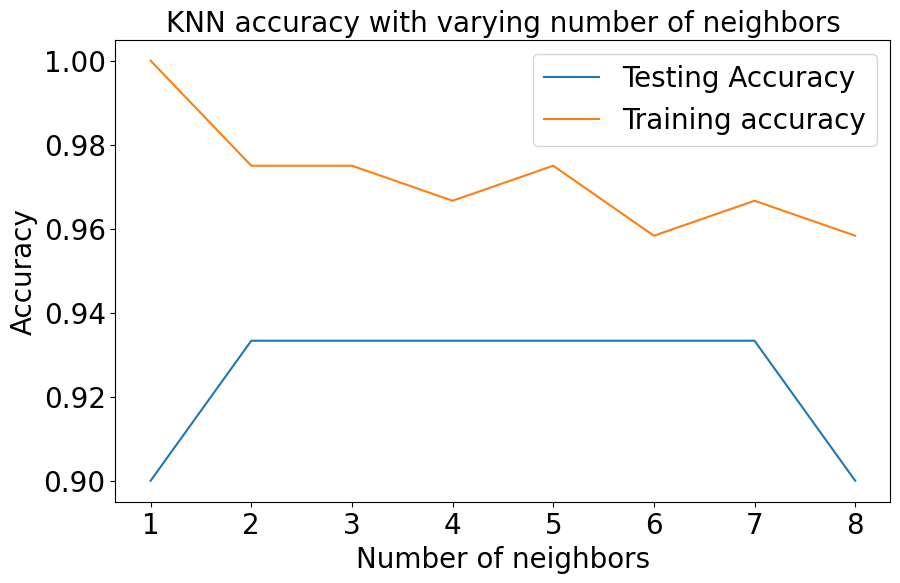

In [28]:
# Plot accuracy per k
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Well, by looking at the above graph, it looks like when n_neighbors=3, both the model performs the best. So, let's stick with n_neighbors=3 and re-run the training once again.

In [29]:
# Instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3) # try 3

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

print(train_accuracy)
print(test_accuracy)

0.975
0.9333333333333333


In [30]:
# Instantiate the classifier
knn_30 = KNeighborsClassifier(n_neighbors=30) # try 30

#Fit the model
knn_30.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn_30.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn_30.score(test_data, test_label)

print(train_accuracy)
print(test_accuracy)

0.925
0.9333333333333333


Let´s plot the decision Boundary. We will only use two columns of the dataset for this visualization.

Try different neighbors and try different input data.

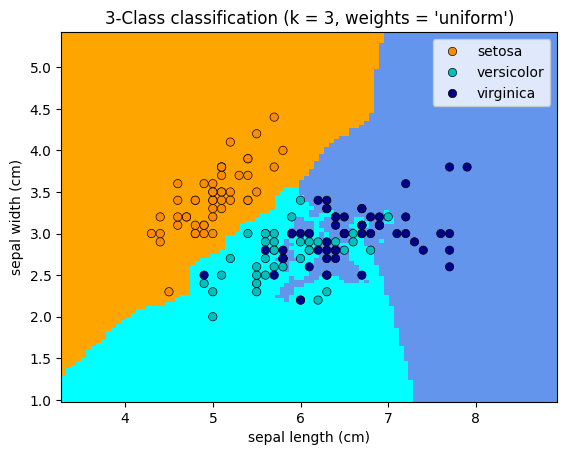

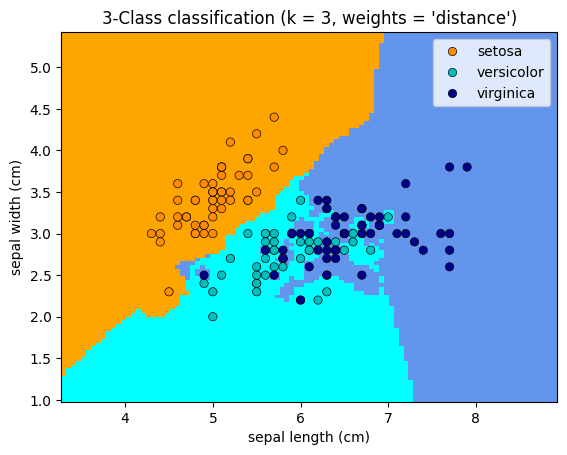

In [31]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 3 #1, 3, 5, 150

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2] # or try 2:4
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

## Evaluating your Model
In the last segment of this tutorial, you will be evaluating your model on the testing data using a couple of techniques like confusion_matrix and classification_report.

Let's first check the accuracy of the model on the testing data.

In [32]:
# Print accuracy
test_accuracy

0.9333333333333333

Viola! It looks like the model was able to classify 96.66% of the testing data correctly. Isn't that amazing? With just a few lines of code, you were able to train an ML model that is now able to tell you the flower name by using only four features with 96.66% accuracy. Who knows maybe it performed way better than a human can.

## Confusion Matrix
A confusion matrix is mainly used to describe the performance of your model on the test data for which the true values or labels are known.

Scikit-learn provides a function that calculates the confusion matrix for you.

In [33]:
# Create predictions for test data
prediction = knn.predict(test_data)

The following plot_confusion_matrix() function has been modified and acquired from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

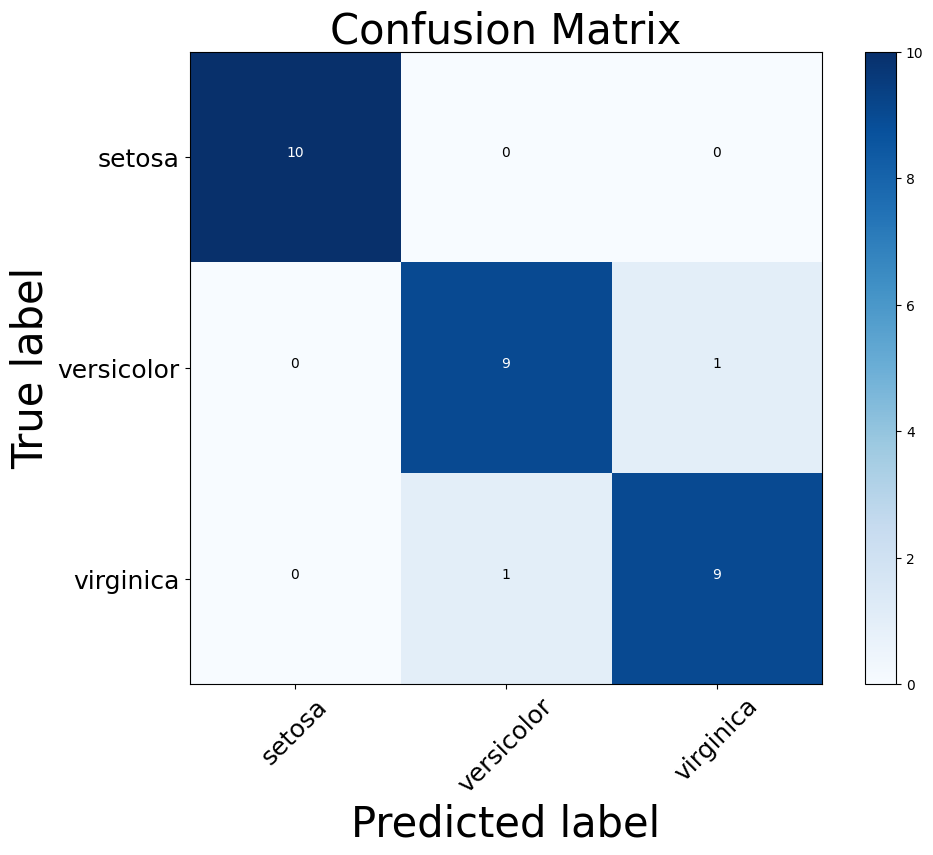

In [34]:
# Create confusion matrix plot
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()


From the above confusion_matrix plot, you can observe that the model classified all the flowers correctly except one versicolor flower which is classified as a virginica flower.

## Classification Report

Classification report helps you in identifying the misclassified classes in much more detail by giving precision, recall and F1 score for each class. You will use the sklearn library to visualize the classification report.

In [35]:
from sklearn.metrics import classification_report

# Print Classification Report
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



**Pros**
The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

**Cons**
The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

**How to improve KNN?**

For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

#**KNN Regression**

In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing Dataset
data = pd.read_csv("used_cars_data.csv")

In [38]:
#Looking at top 5 Rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [39]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
# Remove New_Price column from data
data = data.drop(['New_Price'], axis = 1)
#look at updated data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


In [40]:
from datetime import date
#Create todays year and then calculate
date.today().year
data['Car_Age']=date.today().year-data['Year']
#Look at top of data to see updated column
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [41]:
#Converting column types of Mileage , Engine , Power
data['Mileage'] = data.Mileage.str.split().str.get(0)
data['Engine'] = data.Engine.str.split().str.get(0)
data['Power'] = data.Power.str.split().str.get(0)

data["Mileage"] = data["Mileage"].astype(float)
data["Engine"] = data["Engine"].astype(float)
data["Power"].replace({"null": None}, inplace=True)
data["Power"] = data["Power"].astype(float)

In [42]:
#Seperate columns based on data type and print lists of each type
cat_cols = data.select_dtypes(include=['object','string']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


In [43]:
data.drop(['Name', 'Location'],axis=1,inplace=True)


In [44]:
data.select_dtypes(['int','float64']).corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age
Year,1.000000,-0.187859,0.322463,-0.054693,0.013432,0.008216,0.305327,-1.000000
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094818,0.030164,0.090221,-0.011493,0.187859
Mileage,0.322463,-0.069122,1.000000,-0.593569,-0.531771,-0.310632,-0.306593,-0.322463
Engine,-0.054693,0.094818,-0.593569,1.000000,0.859771,0.399262,0.658354,0.054693
Power,0.013432,0.030164,-0.531771,0.859771,1.000000,0.095905,0.772566,-0.013432
Seats,0.008216,0.090221,-0.310632,0.399262,0.095905,1.000000,0.052225,-0.008216
Price,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,1.000000,-0.305327
Car_Age,-1.000000,0.187859,-0.322463,0.054693,-0.013432,-0.008216,-0.305327,1.000000


In [45]:
#Power is highly correlated with engine as well as Price, thus, removing it.
data = data.drop(['Power'], axis = 1)

In [46]:
#Na % per each column
print((data.isna().sum()/(len(data)))*100)

Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Seats                 0.730732
Price                17.013650
Car_Age               0.000000
dtype: float64


In [47]:
#Remove the rows that have na
data=data.dropna(subset=['Mileage','Engine','Seats','Price'],axis=0)

In [48]:
#Na % per each column
print((data.isna().sum()/(len(data)))*100)

Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Seats                0.0
Price                0.0
Car_Age              0.0
dtype: float64


In [49]:
#Dummy code the categorical variables
data_num=pd.get_dummies(data)

In [50]:
#Describe the data. We need to scale the data for knn regression
data_num.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,5975.0,NaN,NaN,NaN,2013.386778,3.247238,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5975.0,NaN,NaN,NaN,58674.314979,91558.514361,171.0,33908.0,53000.0,73000.0,6500000.0
Mileage,5975.0,NaN,NaN,NaN,18.179408,4.521801,0.0,15.2,18.16,21.1,33.54
Engine,5975.0,NaN,NaN,NaN,1621.606695,601.036987,624.0,1198.0,1493.0,1984.0,5998.0
Seats,5975.0,NaN,NaN,NaN,5.278828,0.808959,0.0,5.0,5.0,5.0,10.0
Price,5975.0,NaN,NaN,NaN,9.501647,11.205736,0.44,3.5,5.65,9.95,160.0
Car_Age,5975.0,NaN,NaN,NaN,10.613222,3.247238,5.0,8.0,10.0,12.0,26.0
Fuel_Type_CNG,5975,2,False,5919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type_Diesel,5975,2,True,3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type_LPG,5975,2,False,5965,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,5.0,1.75,14,True,False,False,False,False,True,True,False,False,False
1,2015,41000,19.67,1582.0,5.0,12.50,9,False,True,False,False,False,True,True,False,False,False
2,2011,46000,18.20,1199.0,5.0,4.50,13,False,False,False,True,False,True,True,False,False,False
3,2012,87000,20.77,1248.0,7.0,6.00,12,False,True,False,False,False,True,True,False,False,False
4,2013,40670,15.20,1968.0,5.0,17.74,11,False,True,False,False,True,False,False,False,True,False


In [52]:
knn_independent = data_num.drop("Price", axis = 1)
knn_dependent = data_num["Price"] #To estimate to Price

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    knn_independent,
    knn_dependent,
    test_size = 0.20,
    random_state = 20)

**Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. I use min/max normalizer. The min-max normalizer linearly rescales every feature to the [0,1] interval. Rescaling to the [0,1] interval is done by shifting the values of each feature
so that the minimal value is 0, and then dividing by the new maximal value (which is the difference between the original maximal and minimal values).

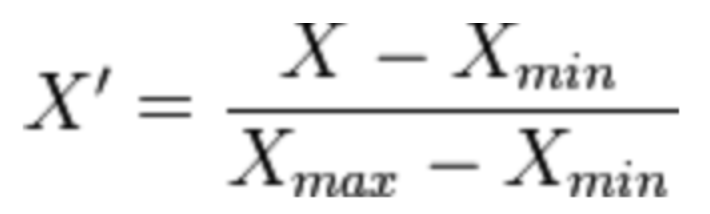

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
predicted_values = knn_model.predict(X_test)

These are scaled values and we need to convert them back to original values

In [56]:
predict_df = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : predicted_values})
predict_df.head()

,Dependent_Test,Dependent_Predicted
5227,2.75,3.205
776,5.08,3.640
4429,18.25,14.750
427,28.50,13.625
1096,7.25,4.775


Coverting values back to its original scale.

In [57]:
predict_df = (predict_df*(np.max(data_num.Price) - np.min(data_num.Price))) + np.min(data_num.Price)
predict_df.head()

,Dependent_Test,Dependent_Predicted
5227,439.2300,511.8298
776,811.0048,581.2384
4429,2912.4100,2353.9500
427,4547.9000,2174.4450
1096,1157.2500,762.3390


In [58]:
from sklearn.metrics import r2_score
r2_score(predicted_values,y_test)

0.682815623276366

In [59]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_params = {"n_neighbors" : np.arange(1,11,1),"weights":['uniform','distance']}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']})

In [60]:
knn_cv_model.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [61]:
knn_model = KNeighborsRegressor(n_neighbors =10,weights='distance').fit(X_train, y_train)
predicted_values = knn_model.predict(X_test)

In [62]:
predict_df = pd.DataFrame({"Dependent_Test_tuned" : y_test, "Dependent_Predicted_tuned" : predicted_values})
predict_df.head()

,Dependent_Test_tuned,Dependent_Predicted_tuned
5227,2.75,4.340243
776,5.08,5.293023
4429,18.25,13.916504
427,28.50,22.893182
1096,7.25,4.718890


Converting back to its original scale

In [63]:
predict_df = (predict_df*(np.max(data_num.Price) - np.min(data_num.Price))) + np.min(data_num.Price)
predict_df.head()

,Dependent_Test_tuned,Dependent_Predicted_tuned
5227,439.2300,692.969105
776,811.0048,844.994683
4429,2912.4100,2220.957311
427,4547.9000,3653.276074
1096,1157.2500,753.386017


In [64]:
r2_score(predicted_values,y_test)

0.7668514037097096

With hyperparameter tuning, we found the optimal k value to be used in the model and we could see that that the accuracy has improved.

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

MSE = []
MSE_CV = []

for k in range(20):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    mse_cv = -1 * cross_val_score(knn_model, X_train,y_train, cv = 10,
                         scoring = "neg_mean_squared_error").mean()
    MSE.append(mse)
    MSE_CV.append(mse_cv)
    print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv)

k = 1 MSE : 60.872579832635985 MSE_CV: 37.09861029288703
k = 2 MSE : 50.277412887029286 MSE_CV: 31.21981156903766
k = 3 MSE : 40.05302130172013 MSE_CV: 29.672539867503485
k = 4 MSE : 33.9302016788703 MSE_CV: 29.50293853294979
k = 5 MSE : 32.89805632803347 MSE_CV: 29.739537723849377
k = 6 MSE : 29.56009069270107 MSE_CV: 29.965189715829847
k = 7 MSE : 28.6199417009649 MSE_CV: 30.297439419349324
k = 8 MSE : 26.621417439853555 MSE_CV: 30.268348851660562
k = 9 MSE : 26.85681427449765 MSE_CV: 31.01976847926029
k = 10 MSE : 27.14766578242678 MSE_CV: 31.010876352301256
k = 11 MSE : 27.906933456205262 MSE_CV: 31.077687819080882
k = 12 MSE : 27.85282927475593 MSE_CV: 31.34333298015458
k = 13 MSE : 28.585634538882424 MSE_CV: 31.467504505706717
k = 14 MSE : 28.874089791648874 MSE_CV: 31.504336865873967
k = 15 MSE : 28.52635516429568 MSE_CV: 31.549353318921437
k = 16 MSE : 28.391313094273016 MSE_CV: 31.762190868691164
k = 17 MSE : 28.317241686959793 MSE_CV: 32.137750663664924
k = 18 MSE : 28.548183

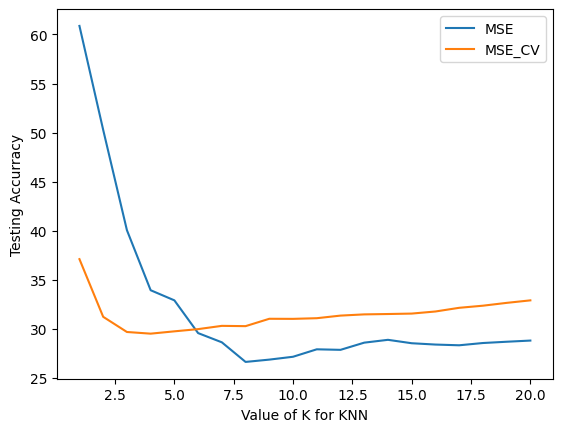

In [66]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,21,1), MSE,label='MSE')
plt.plot(np.arange(1,21,1), MSE_CV,label='MSE_CV')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy")
plt.legend();

The Model starts overfitting beyond a value of k>5.